# Customer Churn Data Exploration

This notebook helps you explore and understand your customer data before building machine learning models.

## What you'll learn:
- Basic statistics about your customers
- Distribution of churn vs non-churn customers
- Which features are most important
- Data quality issues to address

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("📊 Libraries loaded successfully!")

📊 Libraries loaded successfully!


## 1. Load Your Data

Replace the file path below with your actual data file.

In [3]:
# Load the dataset
data_path = 'data/sample_data.csv'  # Update this path to your data file

try:
    df = pd.read_csv(data_path)
    print(f"✅ Data loaded successfully!")
    print(f"📏 Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print(f"❌ File not found: {data_path}")
    print("Please update the data_path variable with the correct path to your data file.")

✅ Data loaded successfully!
📏 Dataset shape: 1000 rows, 9 columns


## 2. First Look at the Data

In [4]:
# Display first few rows
print("🔍 First 5 rows of your data:")
display(df.head())

print("\n📋 Column information:")
print(df.info())

🔍 First 5 rows of your data:


,customer_id,age,tenure_months,monthly_charges,total_charges,contract_type,payment_method,support_calls,churn
0,CUST_0001,52,3,58.82,444.51,Monthly,Credit Card,4,1
1,CUST_0002,42,2,49.96,658.50,Yearly,Electronic Check,3,0
2,CUST_0003,54,20,71.38,1681.26,Monthly,Bank Transfer,0,1
3,CUST_0004,67,24,91.81,2203.44,Monthly,Bank Transfer,2,0
4,CUST_0005,41,1,27.50,354.55,Monthly,Credit Card,2,0



📋 Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   object 
 1   age              1000 non-null   int64  
 2   tenure_months    1000 non-null   int64  
 3   monthly_charges  1000 non-null   float64
 4   total_charges    1000 non-null   float64
 5   contract_type    1000 non-null   object 
 6   payment_method   1000 non-null   object 
 7   support_calls    1000 non-null   int64  
 8   churn            1000 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB
None


In [5]:
# Basic statistics
print("📊 Basic statistics for numerical columns:")
display(df.describe())

print("\n🏷️ Unique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 10:  # Show values if not too many
        print(f"  Values: {df[col].unique()}")

📊 Basic statistics for numerical columns:


,age,tenure_months,monthly_charges,total_charges,support_calls,churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.944000,19.139000,65.357570,2013.996110,1.924000,0.389000
std,14.286671,17.879131,19.206192,1497.115596,1.294566,0.487767
min,18.000000,1.000000,20.000000,47.100000,0.000000,0.000000
25%,35.000000,5.000000,52.147500,936.025000,1.000000,0.000000
50%,45.000000,14.000000,65.140000,1616.445000,2.000000,0.000000
75%,54.000000,27.000000,78.322500,2687.485000,3.000000,1.000000
max,90.000000,72.000000,127.750000,11585.290000,7.000000,1.000000



🏷️ Unique values in categorical columns:
customer_id: 1000 unique values
contract_type: 3 unique values
  Values: ['Monthly' 'Yearly' 'Two-Year']
payment_method: 3 unique values
  Values: ['Credit Card' 'Electronic Check' 'Bank Transfer']


## 3. Check for Data Quality Issues

In [6]:
# Check for missing values
print("🕳️ Missing values check:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("✅ No missing values found!")

🕳️ Missing values check:
✅ No missing values found!


In [14]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"🔄 Duplicate rows: {duplicates}")

if duplicates > 0:
    print("⚠️ Consider removing duplicate rows")
else:
    print("✅ No duplicate rows found!")

🔄 Duplicate rows: 0
✅ No duplicate rows found!


## 4. Target Variable Analysis

Let's understand the churn distribution in your data.

🎯 Target variable (churn) distribution:

Counts:
churn
0    611
1    389
Name: count, dtype: int64

Percentages:
Stayed: 61.1%
Churned: 38.9%


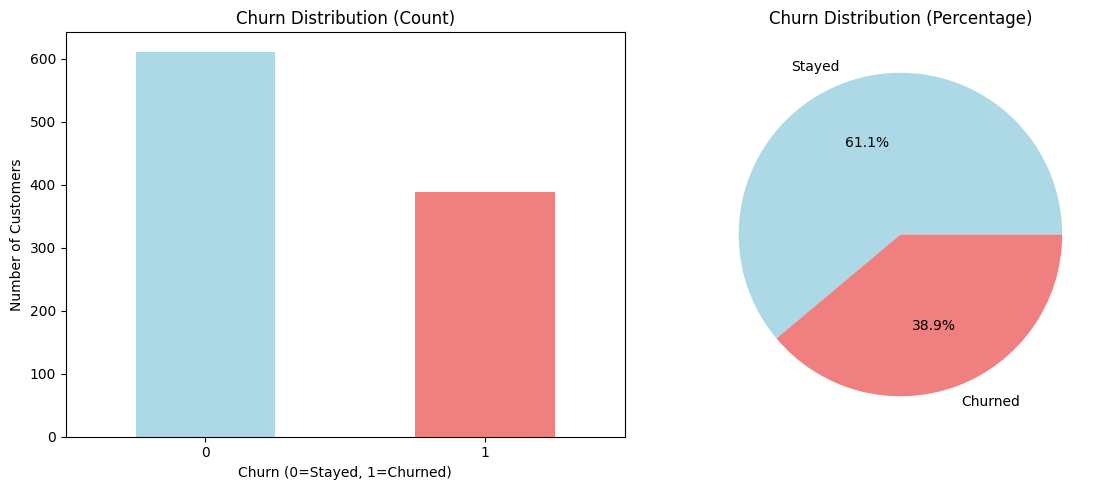

✅ Reasonable class balance: 38.9% minority class


In [15]:
# Analyze target variable (churn)
if 'churn' in df.columns:
    target_col = 'churn'
elif 'Churn' in df.columns:
    target_col = 'Churn'
else:
    print("❌ No 'churn' column found. Please update the column name.")
    target_col = None

if target_col:
    print(f"🎯 Target variable ({target_col}) distribution:")
    
    churn_counts = df[target_col].value_counts()
    churn_percent = df[target_col].value_counts(normalize=True) * 100
    
    print(f"\nCounts:")
    print(churn_counts)
    
    print(f"\nPercentages:")
    for value, percent in churn_percent.items():
        label = 'Churned' if value == 1 else 'Stayed'
        print(f"{label}: {percent:.1f}%")
    
    # Visualize churn distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar plot
    churn_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
    ax1.set_title('Churn Distribution (Count)')
    ax1.set_xlabel('Churn (0=Stayed, 1=Churned)')
    ax1.set_ylabel('Number of Customers')
    ax1.tick_params(axis='x', rotation=0)
    
    # Pie chart
    labels = ['Stayed', 'Churned']
    colors = ['lightblue', 'lightcoral']
    churn_counts.plot(kind='pie', ax=ax2, labels=labels, colors=colors, autopct='%1.1f%%')
    ax2.set_title('Churn Distribution (Percentage)')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    # Check for class imbalance
    minority_class_pct = min(churn_percent)
    if minority_class_pct < 20:
        print(f"⚠️ Class imbalance detected: {minority_class_pct:.1f}% minority class")
        print("Consider using balanced models or sampling techniques")
    else:
        print(f"✅ Reasonable class balance: {minority_class_pct:.1f}% minority class")

## 5. Numerical Features Analysis

📊 Numerical features: ['age', 'tenure_months', 'monthly_charges', 'total_charges', 'support_calls']


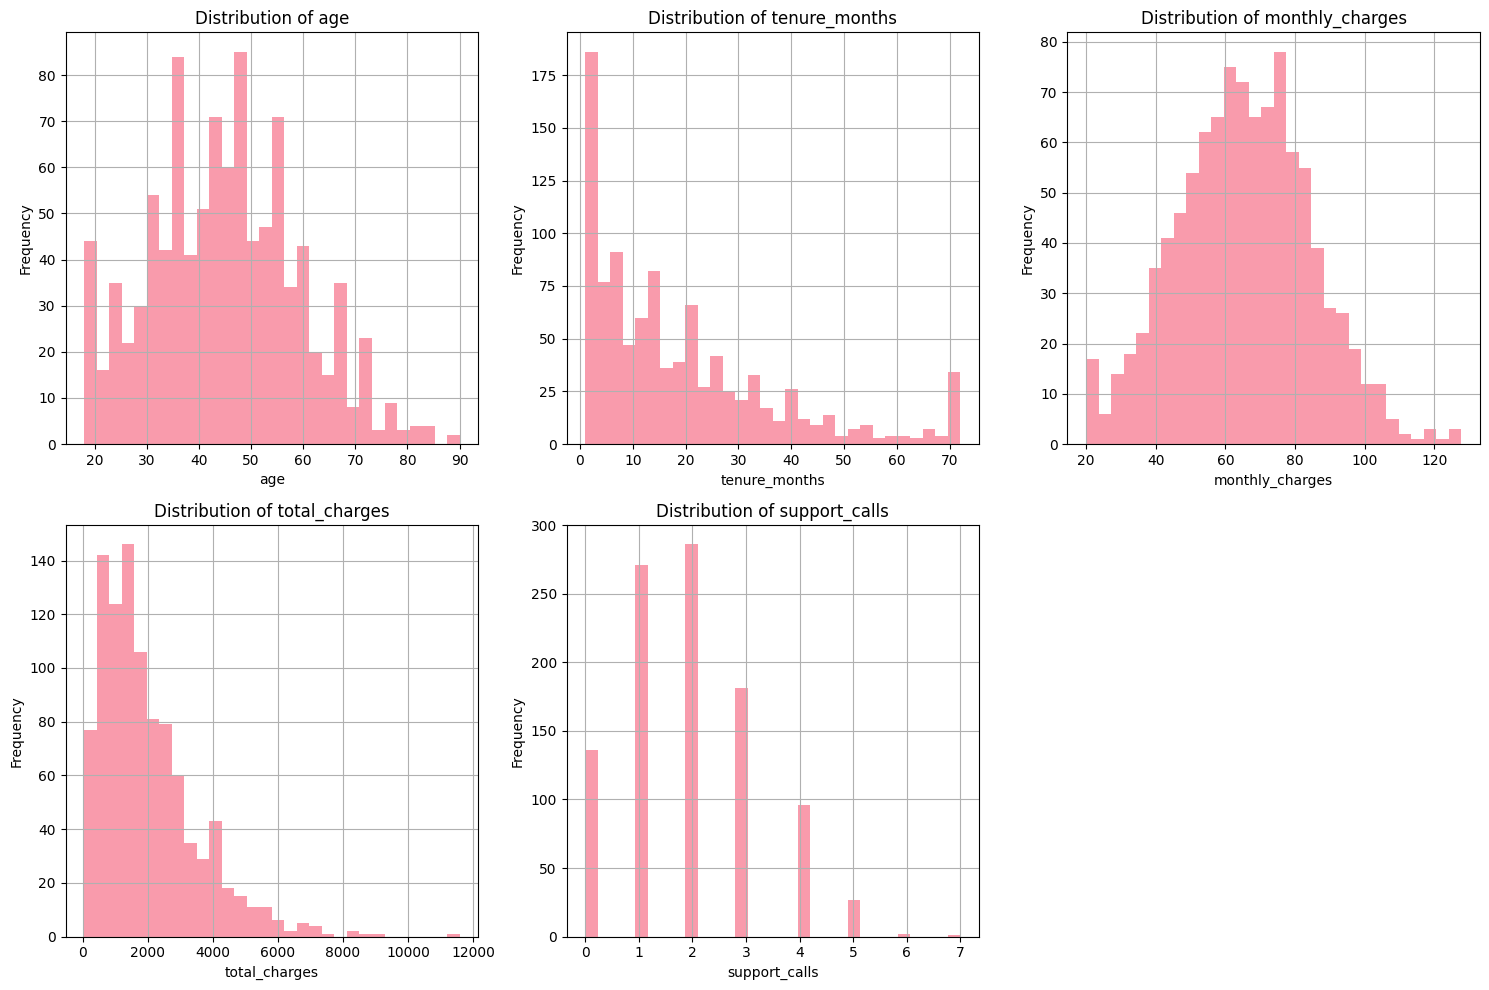

In [16]:
# Analyze numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
# Remove target column if it's numerical
if target_col and target_col in numerical_cols:
    numerical_cols = numerical_cols.drop(target_col)

print(f"📊 Numerical features: {list(numerical_cols)}")

if len(numerical_cols) > 0:
    # Distribution plots
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            ax = axes[i]
            df[col].hist(bins=30, ax=ax, alpha=0.7)
            ax.set_title(f'Distribution of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
    
    # Hide extra subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

## 6. Categorical Features Analysis

🏷️ Categorical features: ['contract_type', 'payment_method']

📈 Distribution of contract_type:
contract_type
Monthly     514
Yearly      285
Two-Year    201
Name: count, dtype: int64


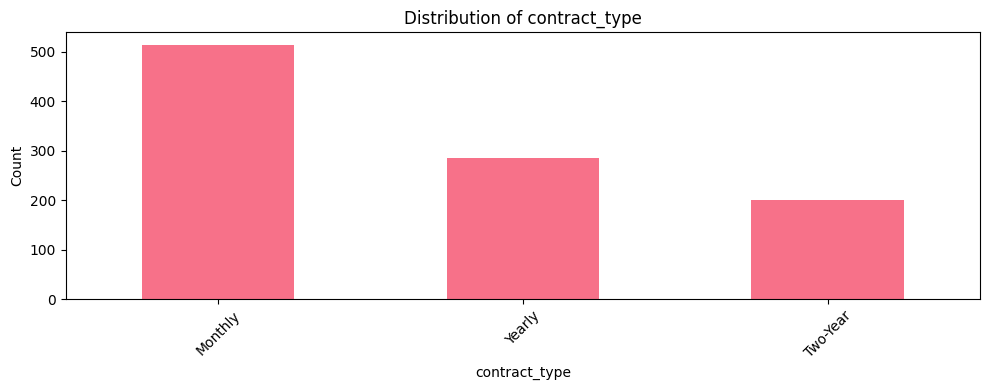


📈 Distribution of payment_method:
payment_method
Credit Card         397
Electronic Check    306
Bank Transfer       297
Name: count, dtype: int64


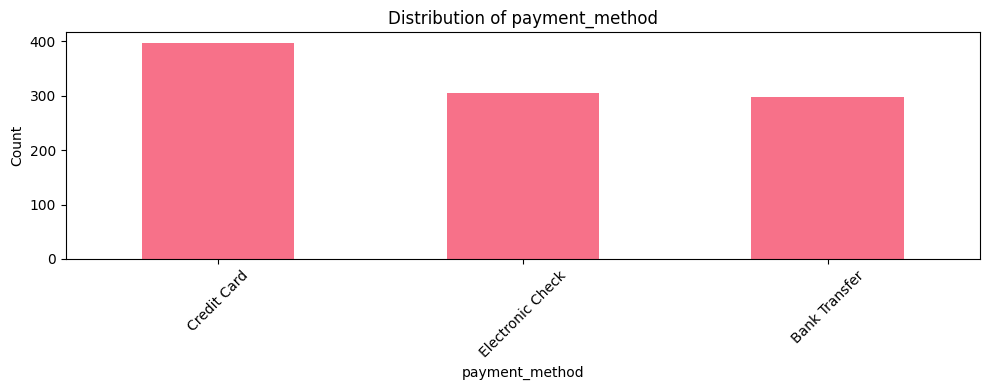

In [17]:
# Analyze categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
# Remove ID columns
categorical_cols = [col for col in categorical_cols if 'id' not in col.lower()]

print(f"🏷️ Categorical features: {list(categorical_cols)}")

if len(categorical_cols) > 0:
    # Show distribution of categorical features
    for col in categorical_cols[:5]:  # Show first 5 categorical columns
        print(f"\n📈 Distribution of {col}:")
        value_counts = df[col].value_counts()
        print(value_counts)
        
        # Plot if not too many categories
        if len(value_counts) <= 10:
            plt.figure(figsize=(10, 4))
            value_counts.plot(kind='bar')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

## 7. Feature Relationships with Churn

Let's see which features are most related to customer churn.

🔍 Analyzing relationship between features and churn...

📊 Numerical features by churn status:

age:
        mean  median    std
churn                      
0      44.49    45.0  13.97
1      45.66    45.0  14.75


<Figure size 800x500 with 0 Axes>

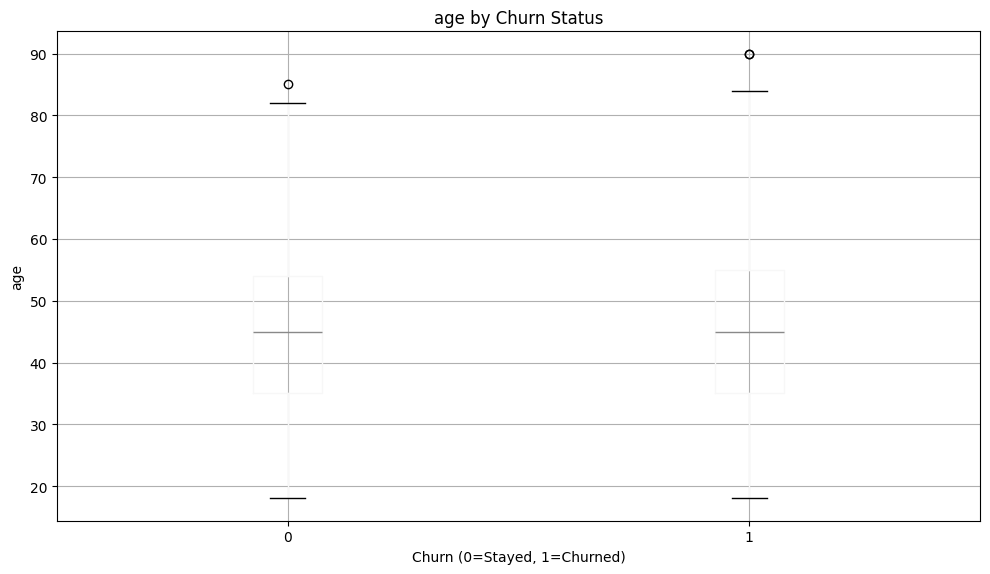


tenure_months:
        mean  median    std
churn                      
0      23.29    19.0  18.57
1      12.61     6.0  14.53


<Figure size 800x500 with 0 Axes>

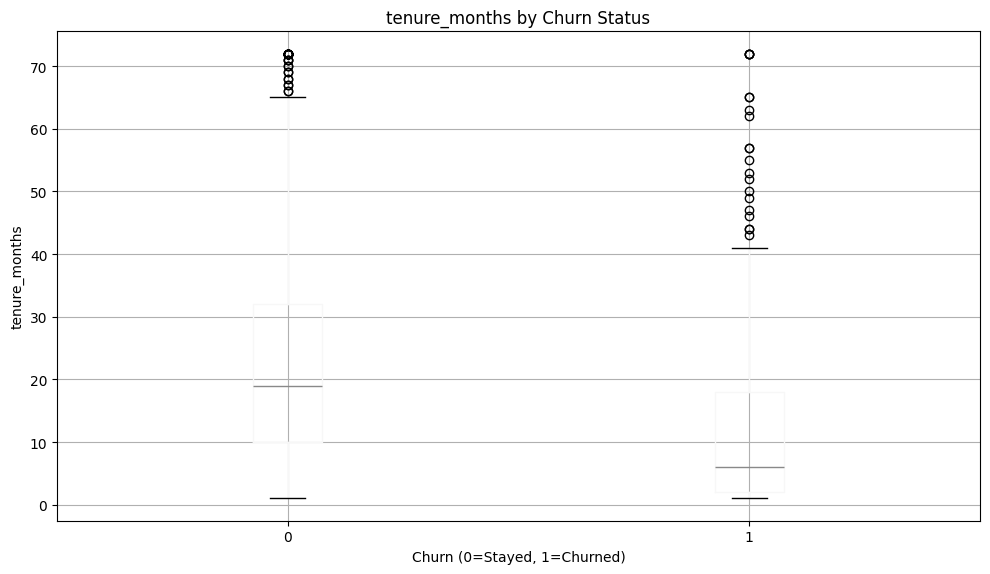


monthly_charges:
        mean  median    std
churn                      
0      62.35   62.37  18.15
1      70.08   71.16  19.89


<Figure size 800x500 with 0 Axes>

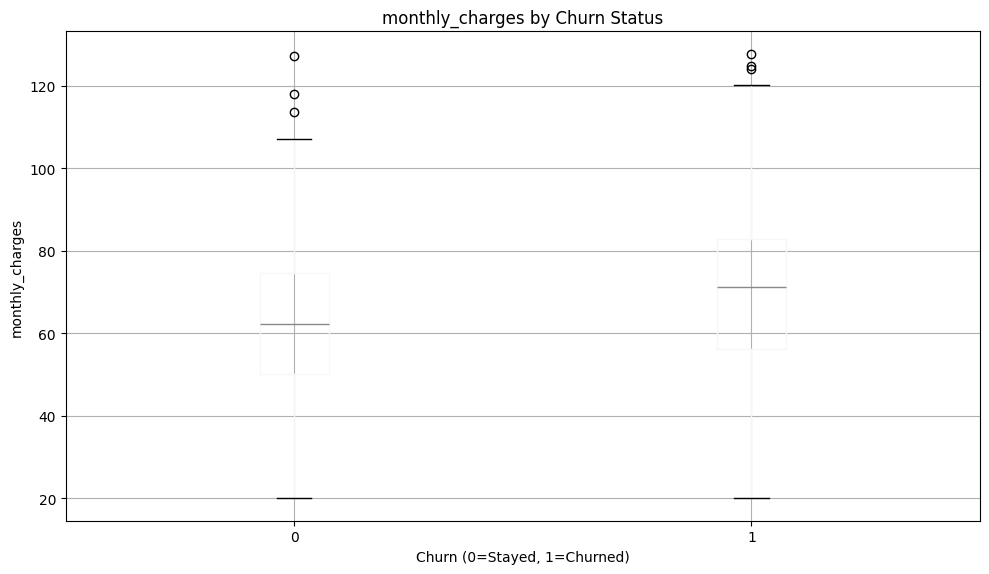


total_charges:
          mean   median      std
churn                           
0      2100.59  1689.70  1485.77
1      1877.99  1393.64  1506.65


<Figure size 800x500 with 0 Axes>

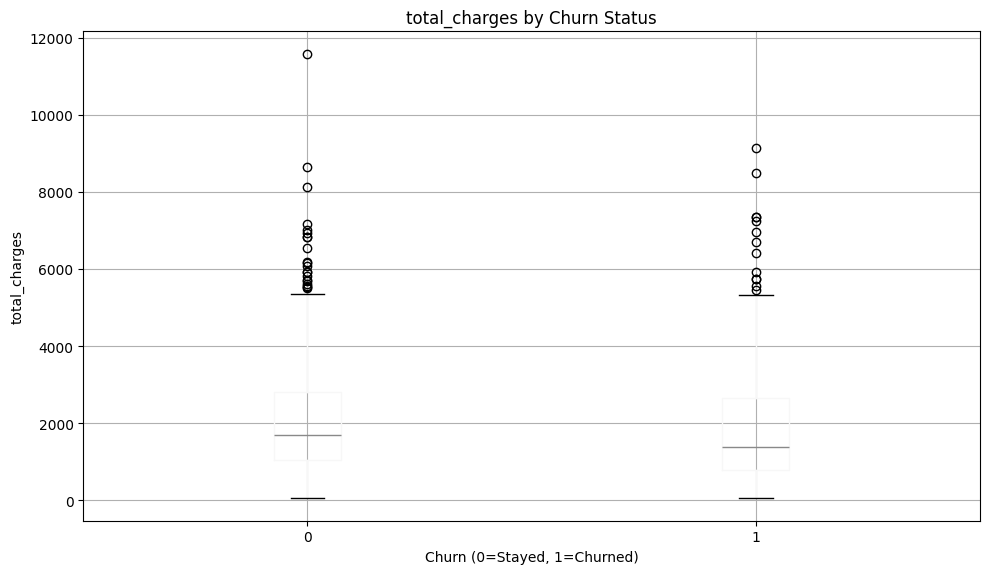

In [18]:
if target_col:
    print("🔍 Analyzing relationship between features and churn...\n")
    
    # Numerical features vs churn
    if len(numerical_cols) > 0:
        print("📊 Numerical features by churn status:")
        
        for col in numerical_cols[:4]:  # Show first 4 numerical features
            print(f"\n{col}:")
            churn_comparison = df.groupby(target_col)[col].agg(['mean', 'median', 'std']).round(2)
            print(churn_comparison)
            
            # Box plot
            plt.figure(figsize=(8, 5))
            df.boxplot(column=col, by=target_col)
            plt.title(f'{col} by Churn Status')
            plt.suptitle('')  # Remove default title
            plt.xlabel('Churn (0=Stayed, 1=Churned)')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()

🏷️ Categorical features vs churn:

contract_type:
Churn rate by category:
churn             0     1
contract_type            
Monthly        50.0  50.0
Two-Year       72.6  27.4
Yearly         73.0  27.0


<Figure size 1000x500 with 0 Axes>

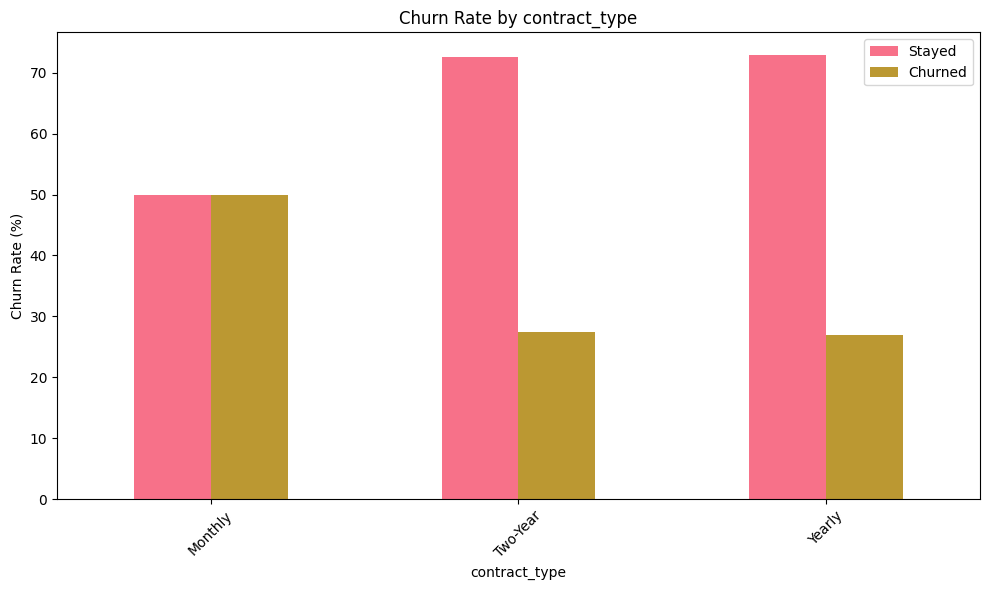


payment_method:
Churn rate by category:
churn                0     1
payment_method              
Bank Transfer     60.9  39.1
Credit Card       63.0  37.0
Electronic Check  58.8  41.2


<Figure size 1000x500 with 0 Axes>

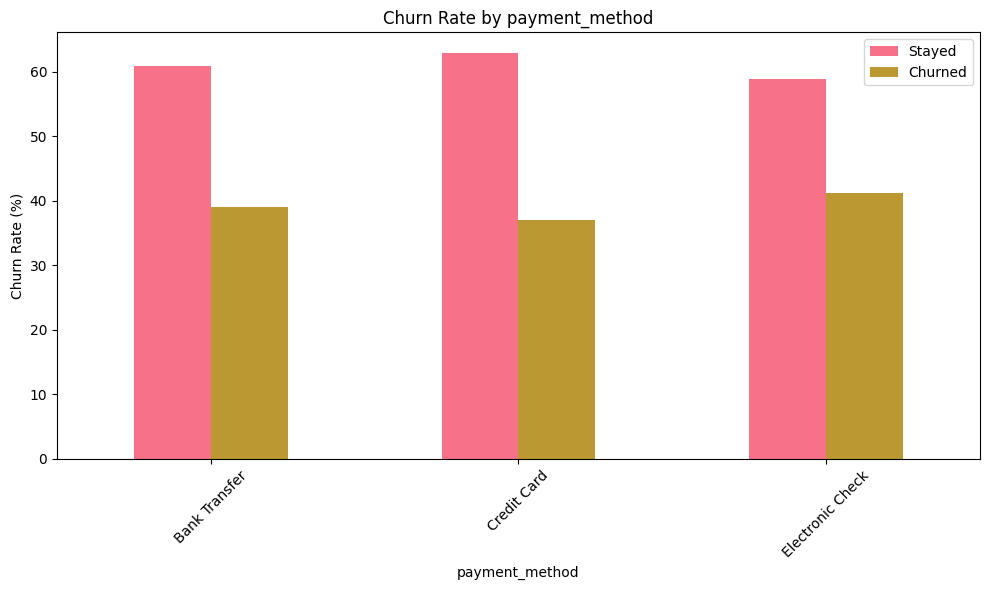

In [19]:
if target_col and len(categorical_cols) > 0:
    print("🏷️ Categorical features vs churn:")
    
    for col in categorical_cols[:3]:  # Show first 3 categorical features
        print(f"\n{col}:")
        
        # Cross-tabulation
        crosstab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        print("Churn rate by category:")
        print(crosstab.round(1))
        
        # Visualization
        if len(df[col].unique()) <= 6:  # Only plot if not too many categories
            plt.figure(figsize=(10, 5))
            crosstab.plot(kind='bar', stacked=False)
            plt.title(f'Churn Rate by {col}')
            plt.xlabel(col)
            plt.ylabel('Churn Rate (%)')
            plt.legend(['Stayed', 'Churned'])
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

## 8. Correlation Analysis

🔗 Correlation between numerical features:


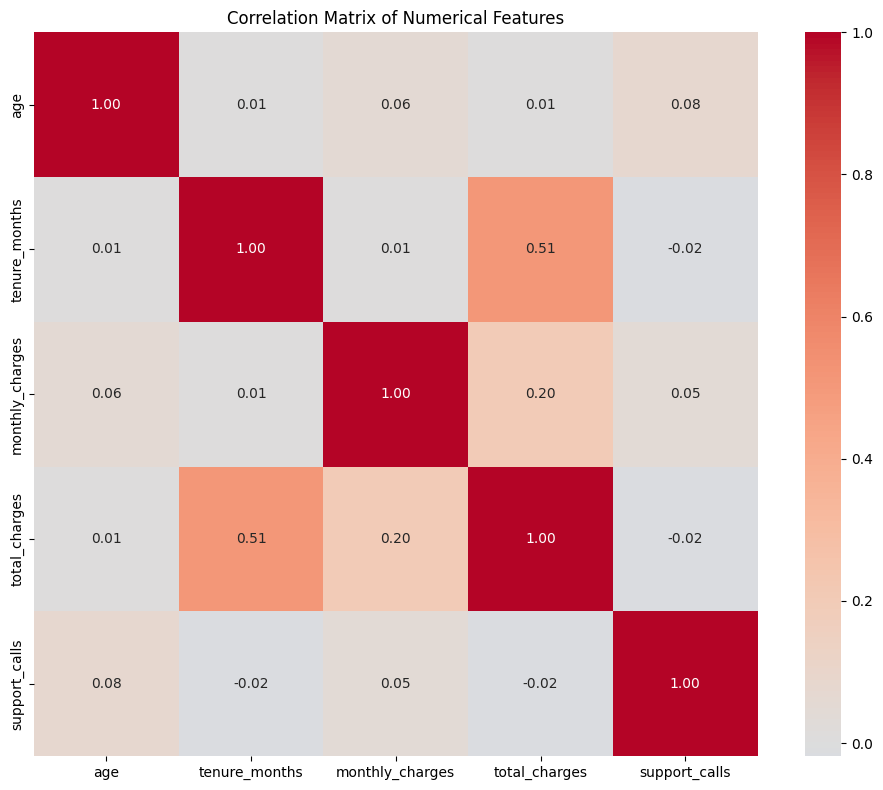

In [20]:
# Correlation matrix for numerical features
if len(numerical_cols) > 1:
    print("🔗 Correlation between numerical features:")
    
    # Include target variable if numerical
    corr_cols = list(numerical_cols)
    if target_col and df[target_col].dtype in [np.number]:
        corr_cols.append(target_col)
    
    correlation_matrix = df[corr_cols].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # Show highest correlations with target
    if target_col in correlation_matrix.columns:
        target_correlations = correlation_matrix[target_col].abs().sort_values(ascending=False)
        print(f"\n🎯 Features most correlated with {target_col}:")
        for feature, corr in target_correlations.head(6).items():
            if feature != target_col:
                print(f"  {feature}: {corr:.3f}")

## 9. Key Insights and Recommendations

Based on the analysis above, here are the key insights about your data:

In [21]:
# Generate insights summary
print("🔑 KEY INSIGHTS FROM YOUR DATA:")
print("=" * 50)

# Dataset overview
print(f"📊 Dataset Overview:")
print(f"  • Total customers: {len(df):,}")
print(f"  • Total features: {df.shape[1]}")
print(f"  • Numerical features: {len(numerical_cols)}")
print(f"  • Categorical features: {len(categorical_cols)}")

# Data quality
missing_total = df.isnull().sum().sum()
print(f"\n🧹 Data Quality:")
if missing_total == 0:
    print(f"  ✅ No missing values - data is clean!")
else:
    print(f"  ⚠️ {missing_total} missing values need attention")

if duplicates == 0:
    print(f"  ✅ No duplicate records")
else:
    print(f"  ⚠️ {duplicates} duplicate records to review")

# Churn insights
if target_col:
    churn_rate = df[target_col].mean() * 100
    print(f"\n🎯 Churn Analysis:")
    print(f"  • Overall churn rate: {churn_rate:.1f}%")
    
    if churn_rate < 10:
        print(f"  ✅ Low churn rate - good customer retention")
    elif churn_rate < 20:
        print(f"  🟡 Moderate churn rate - room for improvement")
    else:
        print(f"  🔴 High churn rate - immediate attention needed")

print(f"\n💡 RECOMMENDATIONS:")
print(f"=" * 30)
print(f"1. 🧹 Clean any missing values before training")
print(f"2. 🔍 Focus on features most correlated with churn")
print(f"3. ⚖️ Consider class balancing if churn rate is very low/high")
print(f"4. 🚀 You're ready to run the main.py script to train your model!")

print(f"\n🎉 Data exploration complete! Check the insights above before modeling.")

🔑 KEY INSIGHTS FROM YOUR DATA:
📊 Dataset Overview:
  • Total customers: 1,000
  • Total features: 9
  • Numerical features: 5
  • Categorical features: 2

🧹 Data Quality:
  ✅ No missing values - data is clean!
  ✅ No duplicate records

🎯 Churn Analysis:
  • Overall churn rate: 38.9%
  🔴 High churn rate - immediate attention needed

💡 RECOMMENDATIONS:
1. 🧹 Clean any missing values before training
2. 🔍 Focus on features most correlated with churn
3. ⚖️ Consider class balancing if churn rate is very low/high
4. 🚀 You're ready to run the main.py script to train your model!

🎉 Data exploration complete! Check the insights above before modeling.


## Next Steps

1. **Address any data quality issues** identified above
2. **Update the config.py file** if needed to match your column names
3. **Run the main pipeline**: `python main.py`
4. **Evaluate the results** and iterate if needed

Remember: This analysis gives you the foundation for building a successful churn prediction model!